# Comparison of Tabular Methods

## Environments

Cliff walking is a deterministic problem, but with a large state space and the terminal state is hard to achive by chance, so episodes can be extremely long. (This advantages TD methods.) One thing about the large state space it that is it forgiving. A random error is not likely fatal, allowing the agent to continue exploring.

Frozen lake is stochastic, actions do not have a deterministic result. The state space is smaller, and there are terminal states that have no reward. A random error is quite likely to end the episode.


In [1]:
%load_ext autoreload

In [2]:
%autoreload
%matplotlib inline
import gym
import numpy as np
import matplotlib.pyplot as plt

from tabular import (
    train_with_plots,
    monte_carlo,
    dyna_q,
    sarsa_lambda,
    q_learning
)

from math_utils import (
    constant,
    exp_decay,
    harmonic_sequence,
    softmax_policy,
    epsilon_greedy
)

from notebook_utils import show_source


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
alpha = exp_decay(1.0, 2e-5, 0.0)
temp = exp_decay(1.0, 1e-5, 0.0)
gamma = 1.0
policy = softmax_policy(temp)

q_learning_episode_fn = q_learning(policy, gamma, alpha)

sarsa_episode_fn = sarsa_lambda(policy, gamma, alpha, 0.0)

lambda_ = 0.5
sarsa_lambda_episode_fn = sarsa_lambda(policy, gamma, alpha, lambda_)

n_planning = 10
dyna_q_episode_fn = dyna_q(policy, gamma, alpha, n_planning)

def initialisation(x):
    def f(state_size, action_size):
        Q = x * np.ones((state_size, action_size), np.float64)
        return Q,

    return f

def dyna_q_initialisation(x):
    def f(state_size, action_size):
        Q = x * np.ones((state_size, action_size), np.float64)
        R = x * np.ones((state_size, action_size, state_size), np.float64)
        T = np.zeros((state_size, action_size, state_size), np.float64)
        return Q, R, T
    
    return f

def episode_runner(env_name, max_eps, avg_window, reward_lim):
    def f(fig, episode_fn, initialisation_fn):
        env = gym.make(env_name)

        state_size = env.observation_space.n
        action_size = env.action_space.n

        init = initialisation_fn(state_size, action_size)

        returns, tracks = train_with_plots(fig, env, episode_fn, max_eps, 
                                           avg_window, reward_lim, 
                                           *init)
    
        return returns, tracks
    return f

cliff_walking = episode_runner('CliffWalking-v0', int(2e5), int(1e3), [-250, 0])
frozen_lake = episode_runner('FrozenLake-v0', int(1e6), int(1e3), [0, 1])

def figure():
    return plt.figure(figsize=(12, 4))


/home/tahsmith/src/rl-projects/.venv/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/tahsmith/src/rl-projects/.venv/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


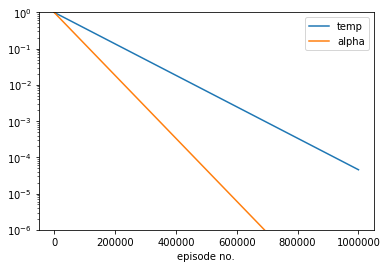

In [ ]:
def plot_schedule(temp, alpha, xlim=int(1e6)):
    x = np.arange(xlim)
    plt.yscale('log')
    plt.ylim([1e-6, 1])
    plt.xlabel('episode no.')
    plt.plot(x, np.vectorize(temp)(x), label='temp')
    plt.plot(x, np.vectorize(alpha)(x), label='alpha')
    plt.legend()

plot_schedule(temp, alpha)

## Monte Carlo

In [ ]:
show_source(monte_carlo)

In [ ]:
monte_carlo_episode_fn = monte_carlo(policy, alpha)

1000000: 0.728

/home/tahsmith/src/rl-projects/.venv/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/tahsmith/src/rl-projects/.venv/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


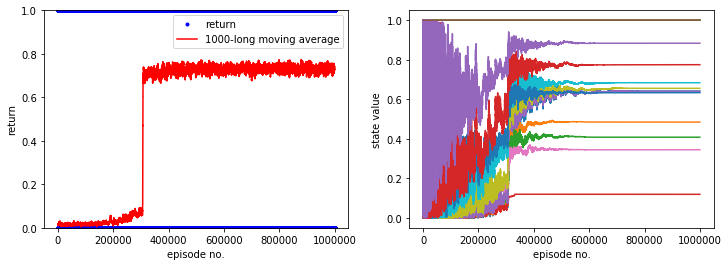

In [ ]:
frozen_lake(figure(), monte_carlo_episode_fn, initialisation(1));

In [ ]:
# cliff_walking(figure(), monte_carlo_episode_fn, initialisation(0));

## Q-learning

In [ ]:
show_source(q_learning)

In [ ]:
cliff_walking(figure(), q_learning_episode_fn, initialisation(0));

184000: -13.012

1000000: 0.74

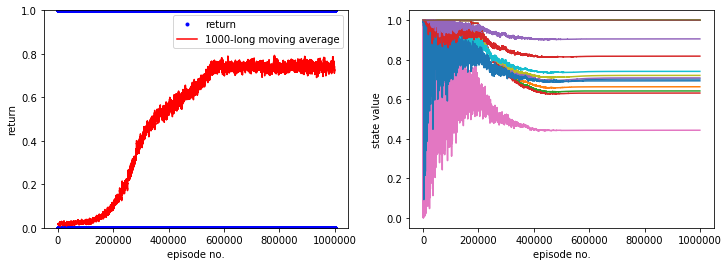

In [ ]:
frozen_lake(figure(), q_learning_episode_fn, initialisation(1));

## sarsa $\lambda$

In [ ]:
show_source(sarsa_lambda)

### $\lambda = 0$

200000: -15.001

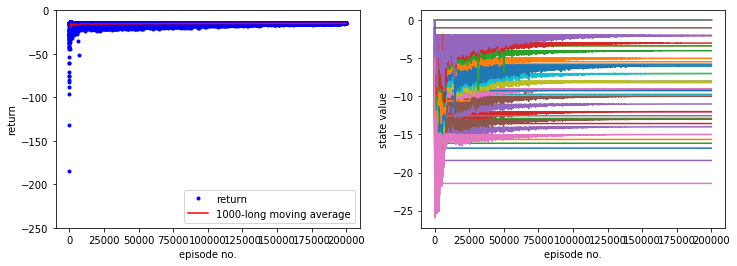

In [ ]:
cliff_walking(figure(), sarsa_episode_fn, initialisation(0));

1000000: 0.742

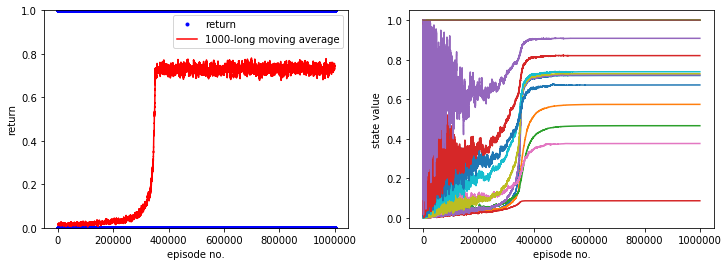

In [ ]:
frozen_lake(figure(), sarsa_episode_fn, initialisation(1));

### $\lambda = 0.5$

200000: -17.009

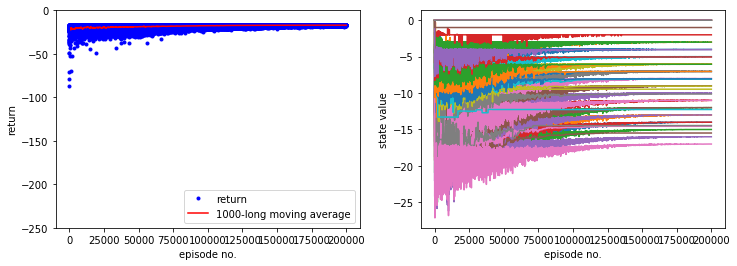

In [ ]:
cliff_walking(figure(), sarsa_lambda_episode_fn, initialisation(0));

1000000: 0.734

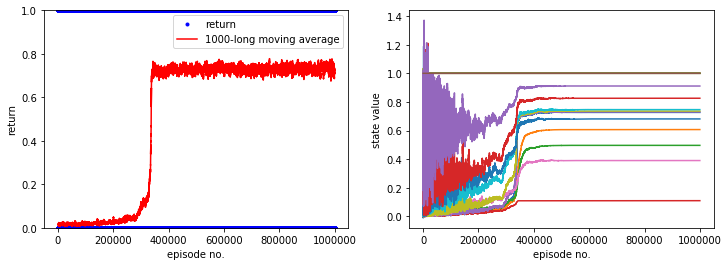

In [ ]:
frozen_lake(figure(), sarsa_lambda_episode_fn, initialisation(1));

## dyna-q

In [ ]:
show_source(dyna_q)

200000: -13.003

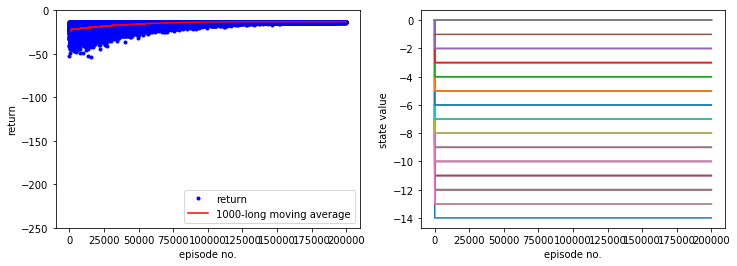

In [ ]:
cliff_walking(figure(), dyna_q_episode_fn, dyna_q_initialisation(0));

1000000: 0.729

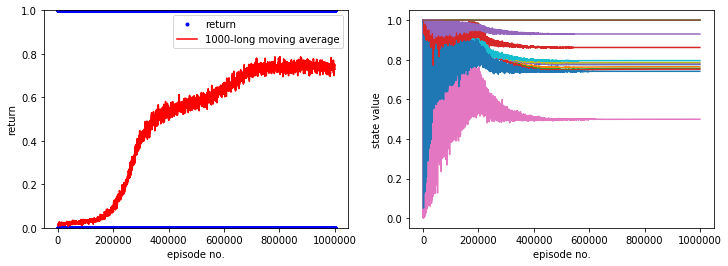

In [ ]:
frozen_lake(figure(), dyna_q_episode_fn, dyna_q_initialisation(1));
